In [42]:
#from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
sw_stat = pd.read_csv('/Users/mkanaka/Documents/Sweden_Stats/Swedent_Stats_ActNum.csv', header=0, index_col=0)
sw_stat = sw_stat.T

In [44]:
sw_stat.columns = [(str(x)[1:]) for x in sw_stat.columns]
sw_stat.fillna(0, inplace=True)
sw_stat.columns

Index(['Population on 31 December', 'Men', 'Women',
       'Number of persons, 0-17 years',
       'Persons aged 0-17 years in % of total population',
       'Number of persons, 65 years and above',
       'Persons aged 65 years and above in % of total population',
       'Household units \n1', 'Average number of residents per household \n2',
       'Swedish citizens', 'Foreign citizens \n3',
       'Proportion of foreign citizens in %', 'Foreign-born',
       'Proportion foreign-born in %', 'Foreign-born who are Swedish citizens',
       'Proportion foreign-born who are Swedish citizens in %',
       'Swedish-born with two foreign-born parents', 'Foreign background \n4',
       'Proportion foreign background in % \n4', 'Births',
       'Crude birth rate (per 1000)', 'Total fertility rate \n5', 'Deaths',
       'Crude death rate (per 1000)', 'Life expectancy, men \n6',
       'Life expectancy, women \n6', 'Infant mortality rate (per 1000)',
       'In-migration', 'In-migrations per 100

In [45]:
sw_filter = sw_stat.filter(items=["Persons aged 0-17 years in % of total population", 'Persons aged 65 years and above in % of total population',
                      'Population growth per 1000 inhabitants', 'Proportion of foreign citizens in %', 'Proportion foreign-born in %',
                      'Proportion foreign-born who are Swedish citizens in %', 'Proportion foreign background in % \n4',
                      'Crude birth rate (per 1000)', 'Total fertility rate \n5', 'Crude death rate (per 1000)',])
sw_filter.head(5)
sw_filter.shape

(43, 10)

In [46]:

sw_stat.drop(["Registered partnership \n9", "Men", "Women", "Persons aged 0-17 years in % of total population",
              'Persons aged 65 years and above in % of total population', 'Household units \n1',
              'Average number of residents per household \n2', 'Out-migration', 'Out-migrations per 1000 inhabitants',
              'Population growth per 1000 inhabitants', 'Deregistered partnership \n10',
              'Persons who became Swedish citizens \n11',
              'Proportion of foreign citizens in %', 'Proportion foreign-born in %',
              'Proportion foreign-born who are Swedish citizens in %', 'Proportion foreign background in % \n4',
              'Crude birth rate (per 1000)', 'Total fertility rate \n5', 'Crude death rate (per 1000)',
              'Life expectancy, men \n6', 'Life expectancy, women \n6', 'Infant mortality rate (per 1000)',
              'In-migrations per 1000 inhabitants'], axis=1, inplace=True)
sw_stat.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2019 to 1960
Data columns (total 15 columns):
Population on 31 December                     43 non-null object
Number of persons, 0-17 years                 43 non-null object
Number of persons, 65 years and above         43 non-null object
Swedish citizens                              43 non-null object
Foreign citizens 
3                           43 non-null object
Foreign-born                                  43 non-null object
Foreign-born who are Swedish citizens         43 non-null object
Swedish-born with two foreign-born parents    43 non-null object
Foreign background 
4                         43 non-null object
Births                                        43 non-null object
Deaths                                        43 non-null object
In-migration                                  43 non-null object
Population growth                             43 non-null object
Marriages 
7                                  43 non

In [47]:
sw_stat.shape

(43, 15)

In [48]:
sw_stat.isnull()
sw_stat.replace(to_replace='\n', value=0, inplace=True)

In [49]:
#sw_stat.astype('int32').dtypes
sw_stat = sw_stat.applymap(lambda x : int(x))
sw_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2019 to 1960
Data columns (total 15 columns):
Population on 31 December                     43 non-null int64
Number of persons, 0-17 years                 43 non-null int64
Number of persons, 65 years and above         43 non-null int64
Swedish citizens                              43 non-null int64
Foreign citizens 
3                           43 non-null int64
Foreign-born                                  43 non-null int64
Foreign-born who are Swedish citizens         43 non-null int64
Swedish-born with two foreign-born parents    43 non-null int64
Foreign background 
4                         43 non-null int64
Births                                        43 non-null int64
Deaths                                        43 non-null int64
In-migration                                  43 non-null int64
Population growth                             43 non-null int64
Marriages 
7                                  43 non-null int64
D

In [50]:
sw_stat

,Population on 31 December,"Number of persons, 0-17 years","Number of persons, 65 years and above",Swedish citizens,Foreign citizens 3,Foreign-born,Foreign-born who are Swedish citizens,Swedish-born with two foreign-born parents,Foreign background 4,Births,Deaths,In-migration,Population growth,Marriages 7,Divorces 8
2019,10327589,2180508,2065367,9387009,940580,2019733,1168202,615234,2634967,114523,88766,115805,97404,48481,25408
2018,10230185,2155379,2035711,9297919,932266,1955569,1110727,587851,2543420,115832,92185,132602,109943,50796,24958
2017,10120242,2121598,2006146,9222906,897336,1877050,1064041,561957,2439007,115416,91972,144489,125089,52497,24210
2016,9995153,2076407,1976857,9143204,851949,1784497,1012941,535805,2320302,117425,90982,163005,144136,53817,24258
2015,9851017,2025077,1947227,9068184,782833,1676264,969494,510756,2187020,114870,90907,134240,103662,52314,24876
2014,9747355,1985282,1912884,9007920,739435,1603551,937016,488655,2092206,114907,88976,126966,102491,53113,26143
2013,9644864,1952478,1872207,8950202,694662,1533493,908913,467697,2001190,113593,90402,115845,88971,51610,26933
2012,9555893,1928121,1828283,8888661,667232,1473256,875227,448736,1921992,113177,91938,103059,73038,56240,25005
2011,9482855,1919206,1784668,8827755,655100,1427296,841179,430253,1857549,111770,89938,96467,67285,53013,24884
2010,9415570,1919094,1737246,8782278,633292,1384929,818574,412960,1797889,115641,90487,98801,74888,56555,25151


In [51]:
col_rn = '''POP
<=17
>=65
SWDNCTZ
FCTZ
FB
FBSCTZ
SB2FP
FBG
Births
Deaths
In-migration
PGRWTH
Marriages
Divorces'''

sw_stat.columns = col_rn.split('\n')

In [12]:
#sw_stat.reset_index(drop=True)
#sw_stat.reset_index

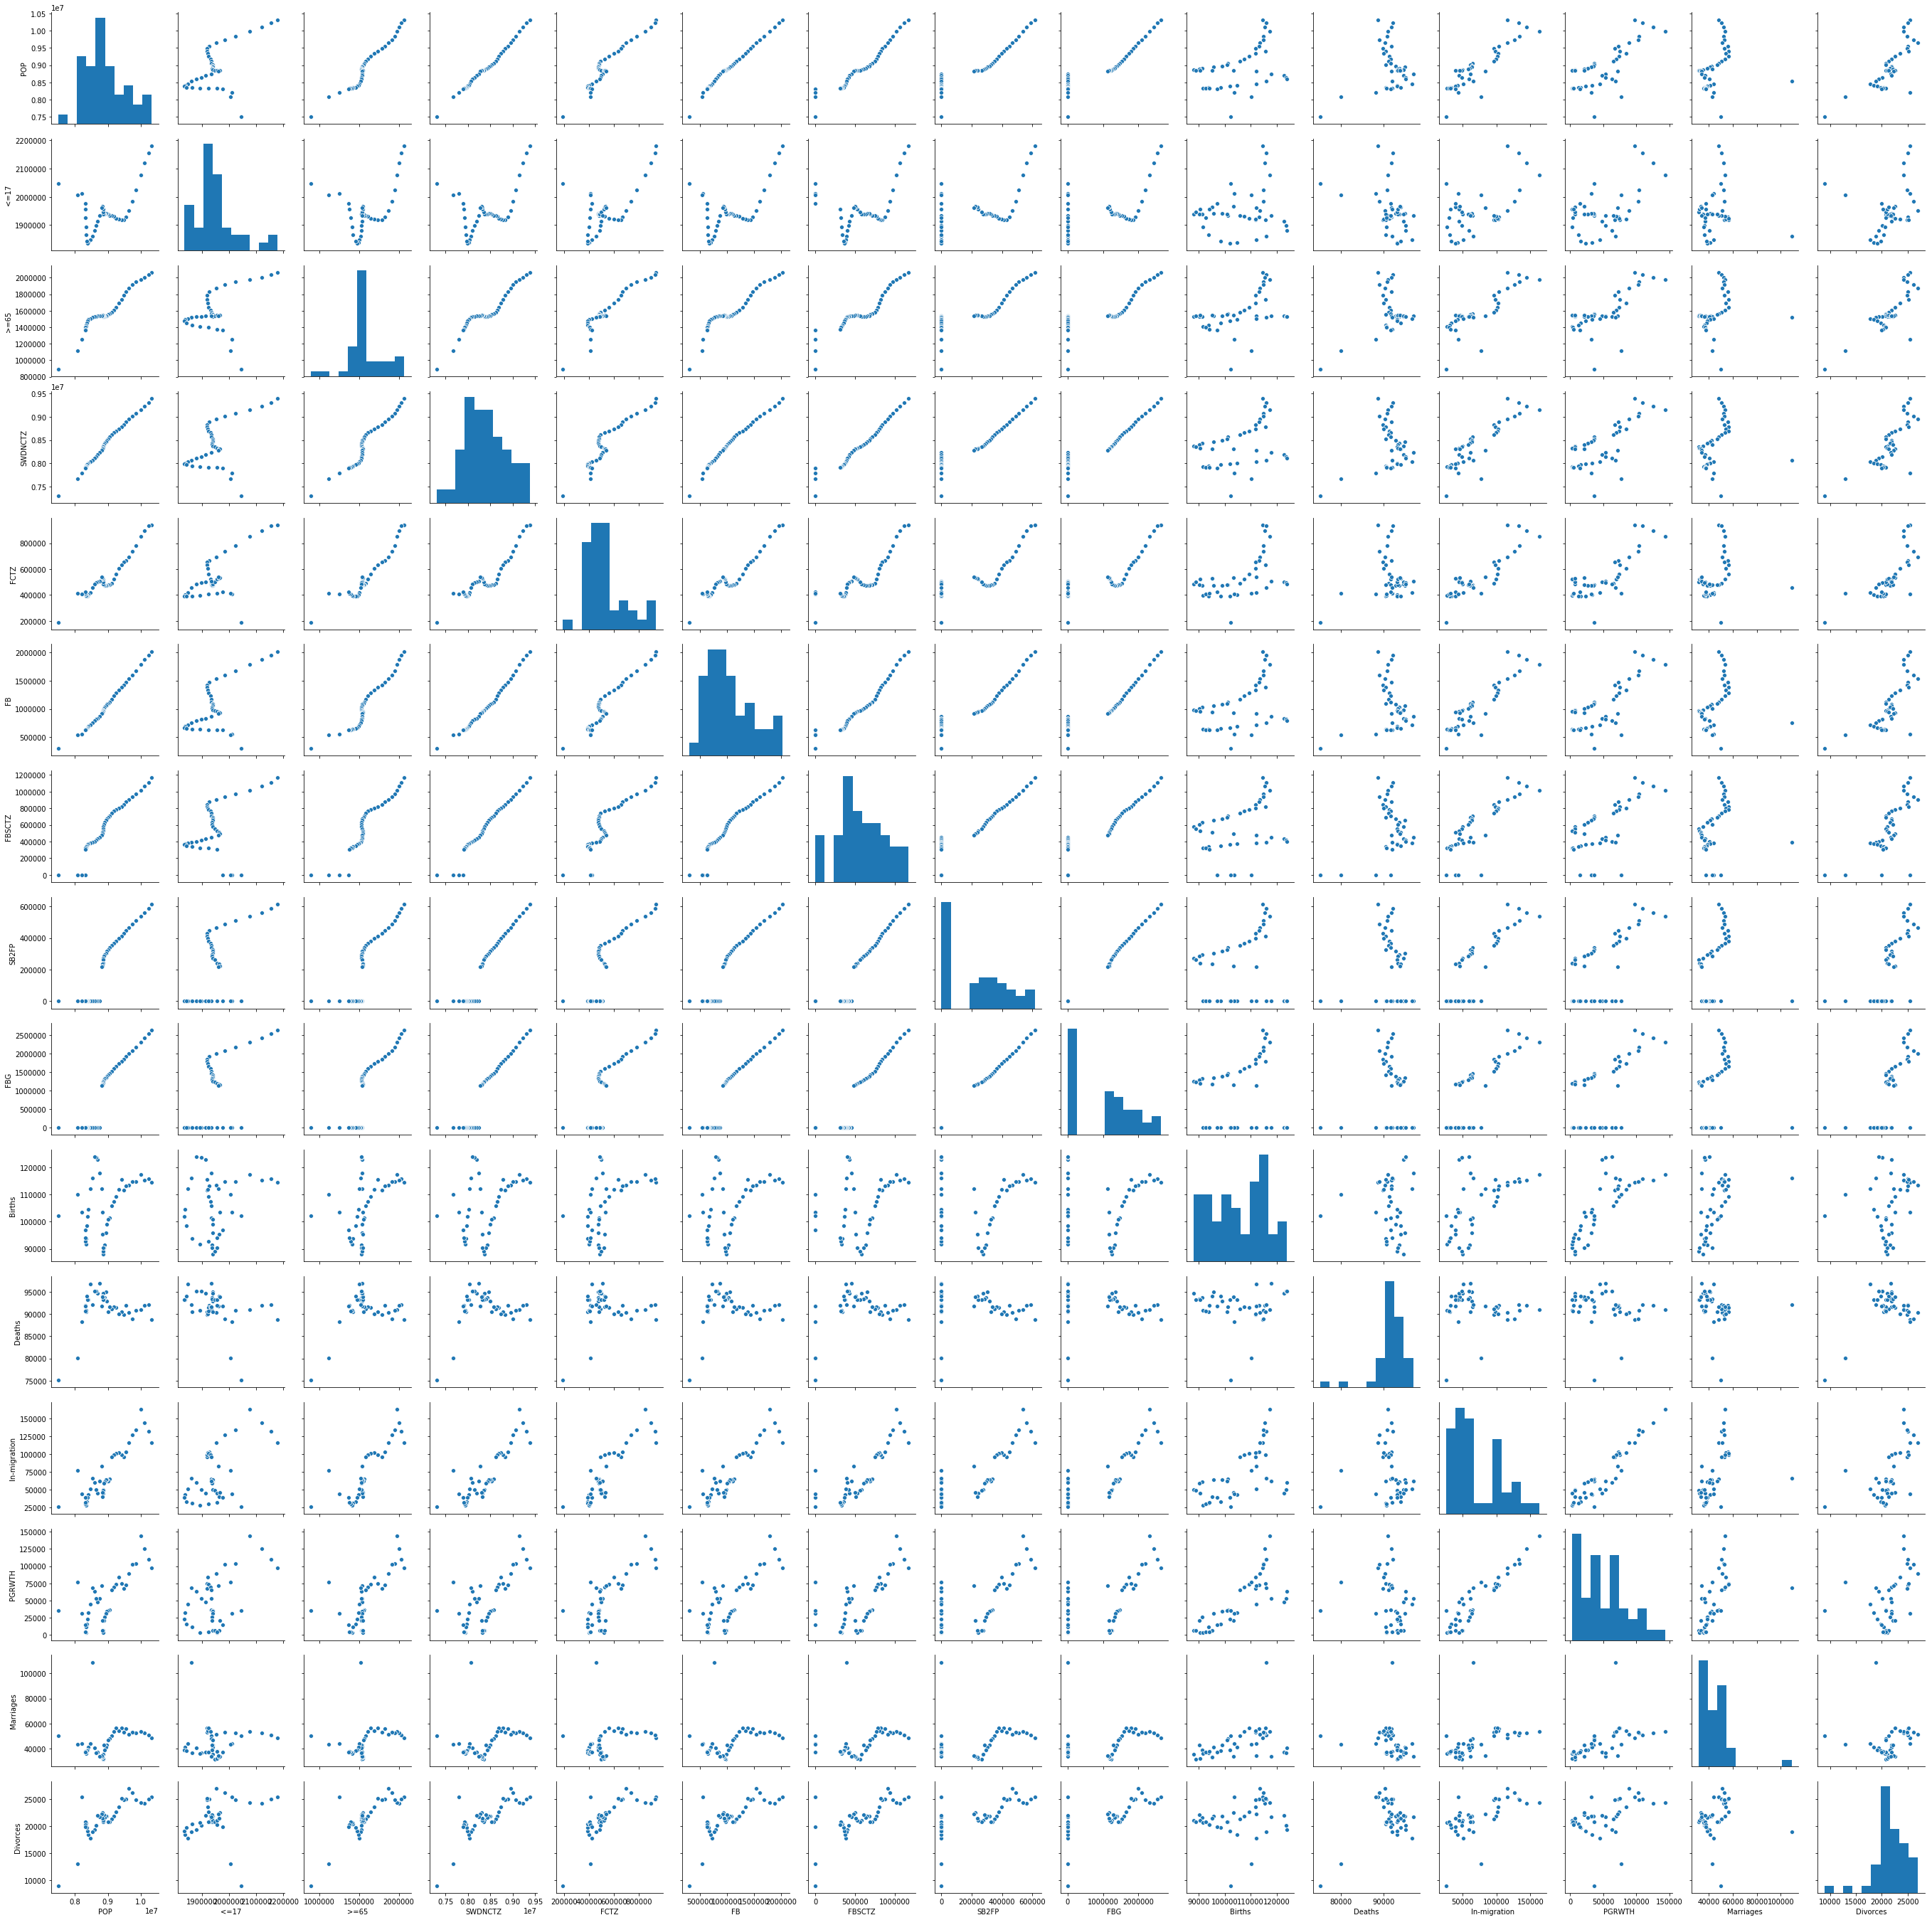

In [52]:
# corr = sw_stat.corr();
# sns.heatmap(corr);
#sw_stat.reset_index(drop=True, inplace=True)
#sw_stat.head(5)
sns.pairplot(sw_stat)

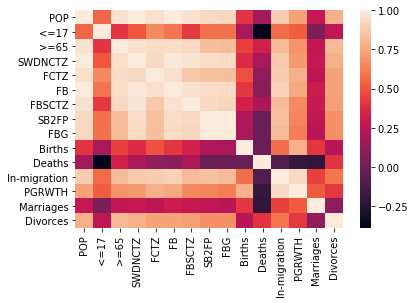

In [53]:
# Increase default figure and font sizes for easier viewing.
# plt.style.use('fivethirtyeight')
# plt.rcParams['figure.figsize'] = (10, 8)
# plt.rcParams['font.size'] = 14
stat_correlations = sw_stat.corr();
sns.heatmap(stat_correlations);

In [54]:
''''POP - Population on 31 December', 
'<=17 - Number of persons, 0-17 years',
'>=65 - Number of persons, 65 years and above',
'SWDNCTZ - Swedish citizens',
'FCTZ - Foreign citizens \n3', 
'FB - Foreign-born',
'FBSCTZ - Foreign-born who are Swedish citizens',
'SB2FP - Swedish-born with two foreign-born parents',
'FBG - Foreign background \n4',
'Births - Births',
'Deaths', 
'In-migration', 
'PGRWTH - Population growth',
'Marriages \n7', 
'Divorces \n8' '''

"'POP - Population on 31 December', \n'<=17 - Number of persons, 0-17 years',\n'>=65 - Number of persons, 65 years and above',\n'SWDNCTZ - Swedish citizens',\n'FCTZ - Foreign citizens \n3', \n'FB - Foreign-born',\n'FBSCTZ - Foreign-born who are Swedish citizens',\n'SB2FP - Swedish-born with two foreign-born parents',\n'FBG - Foreign background \n4',\n'Births - Births',\n'Deaths', \n'In-migration', \n'PGRWTH - Population growth',\n'Marriages \n7', \n'Divorces \n8' "

In [55]:
sw_filter.isnull()
sw_filter.replace(to_replace='\n', value=0, inplace=True)
sw_filter = sw_filter.applymap(lambda x : float(x))
sw_filter.info()

sw_filter.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2019 to 1960
Data columns (total 10 columns):
Persons aged 0-17 years in % of total population            43 non-null float64
Persons aged 65 years and above in % of total population    43 non-null float64
Population growth per 1000 inhabitants                      43 non-null float64
Proportion of foreign citizens in %                         43 non-null float64
Proportion foreign-born in %                                43 non-null float64
Proportion foreign-born who are Swedish citizens in %       43 non-null float64
Proportion foreign background in % 
4                       43 non-null float64
Crude birth rate (per 1000)                                 43 non-null float64
Total fertility rate 
5                                     43 non-null float64
Crude death rate (per 1000)                                 43 non-null float64
dtypes: float64(10)
memory usage: 4.9+ KB


,Persons aged 0-17 years in % of total population,Persons aged 65 years and above in % of total population,Population growth per 1000 inhabitants,Proportion of foreign citizens in %,Proportion foreign-born in %,Proportion foreign-born who are Swedish citizens in %,Proportion foreign background in % 4,Crude birth rate (per 1000),Total fertility rate 5,Crude death rate (per 1000)
2019,21.1,20.0,9.5,9.1,19.6,57.8,25.5,11.1,1.70,8.6
2018,21.1,19.9,10.9,9.1,19.1,56.8,24.9,11.4,1.75,9.1
2017,21.0,19.8,12.5,8.9,18.5,56.7,24.1,11.5,1.78,9.1
2016,20.8,19.8,14.6,8.5,17.9,56.8,23.2,11.8,1.85,9.2
2015,20.6,19.8,10.6,7.9,17.0,57.8,22.2,11.7,1.85,9.3
2014,20.4,19.6,10.6,7.6,16.5,58.4,21.5,11.9,1.88,9.2
2013,20.2,19.4,9.3,7.2,15.9,59.3,20.7,11.8,1.89,9.4
2012,20.2,19.1,7.7,7.0,15.4,59.4,20.1,11.9,1.90,9.7
2011,20.2,18.8,7.1,6.9,15.1,58.9,19.6,11.8,1.90,9.5
2010,20.4,18.5,8.0,6.7,14.7,59.1,19.1,12.3,1.98,9.6


In [58]:
sw_filter['Proportion foreign-born who are Swedish citizens in %']

2019    57.8
2018    56.8
2017    56.7
2016    56.8
2015    57.8
2014    58.4
2013    59.3
2012    59.4
2011    58.9
2010    59.1
2009    59.8
2008    61.0
2007    62.3
2006    63.5
2005    63.2
2004    62.5
2003    62.4
2002    62.1
2001    61.4
2000    60.7
1999    59.2
1998    57.6
1997    55.1
1996    54.1
1995    53.1
1994    51.8
1993    52.4
1992    51.6
1991    50.8
1990    50.4
1989    51.6
1988    53.5
1987    54.3
1986    54.3
1985    53.8
1984    52.8
1983    51.3
1982    50.2
1981    49.0
1980     0.0
1975     0.0
1970     0.0
1960     0.0
Name: Proportion foreign-born who are Swedish citizens in %, dtype: float64

In [56]:
records = sw_filter.to_records()[::-1]
records.index = records.index.astype('int64')
type(records.index[1])

int

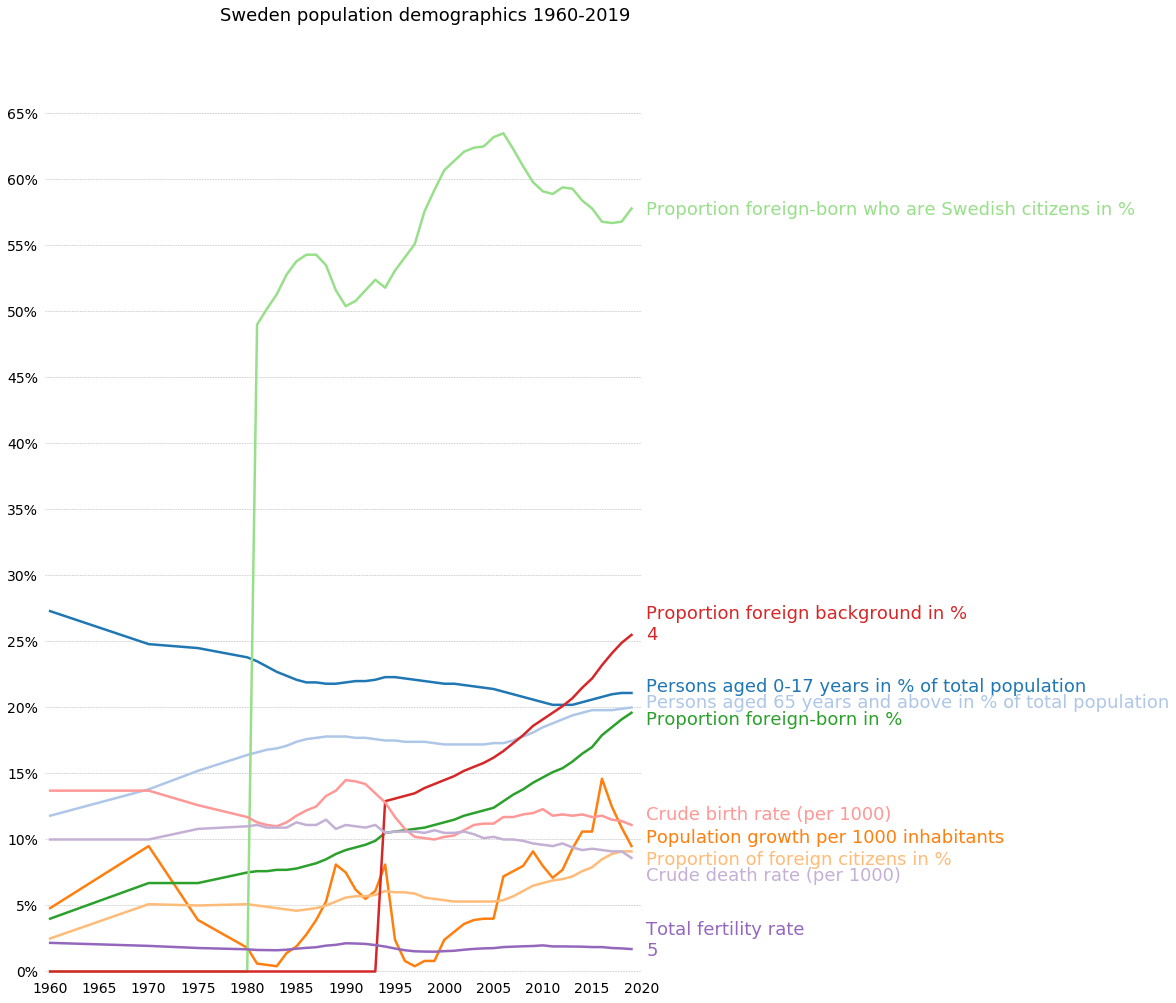

In [57]:
import matplotlib.pyplot as plt
# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)

# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1959.5, 2019)
ax.set_ylim(-0.25, 70)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(1960, 2021, 5), fontsize=14)
plt.yticks(range(0, 66, 5), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=0.3)


# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
majors = ["Persons aged 0-17 years in % of total population", 
          'Persons aged 65 years and above in % of total population',
          'Population growth per 1000 inhabitants', 
          'Proportion of foreign citizens in %', 
          'Proportion foreign-born in %',
          'Proportion foreign-born who are Swedish citizens in %', 
          'Proportion foreign background in % \n4',
          'Crude birth rate (per 1000)', 
          'Total fertility rate \n5', 
          'Crude death rate (per 1000)']
y_offsets = {'Persons aged 0-17 years in % of total population': 0.60, 
             'Persons aged 65 years and above in % of total population': 0.5,
             'Population growth per 1000 inhabitants': 0.75, 
             'Proportion of foreign citizens in %': -0.50, 
             'Proportion foreign-born in %': -0.40,
             'Proportion foreign background in % \n4': 0.10,
             'Crude birth rate (per 1000)': 0.90,  
             'Crude death rate (per 1000)': -1.25}
# y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
#              'Communications\nand Journalism': 0.75,
#              'Art and Performance': -0.25, 'Agriculture': 1.25,
#              'Social Sciences and History': 0.25, 'Business': -0.75,
#              'Math and Statistics': 0.75, 'Architecture': -0.75,
#              'Computer Science': 0.75, 'Engineering': -0.25}

for rank, column in enumerate(majors):
    # Plot each line separately with its own color.
    #column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()
    line = plt.plot(records.index,
                    records[column],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = records[column][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2020.5, y_pos, column, fontsize=18, color=color_sequence[rank])

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle('Sweden population demographics 1960-2019', fontsize=18, ha='center')

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# plt.savefig('percent-bachelors-degrees-women-usa.png', bbox_inches='tight')
plt.show()